<a href="https://colab.research.google.com/github/dgambone3/dgambone3/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
### Run once to download dataset directly from Kaggle ###
# ! pip install -q kaggle
# ! mkdir ~/.kaggle
# ! cp /kaggle.json ~/.kaggle/
# ! chmod 600 ~/kaggle.json
# ! kaggle datasets download alexteboul/diabetes-health-indicators-dataset
# ! unzip diabetes-health-indicators-dataset.zip

In [5]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import numpy as np



# metrics
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


# processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV



# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier



In [6]:
df = pd.read_csv('/content/drive/MyDrive/Diabetes Indicators Dataset/diabetes_012_health_indicators_BRFSS2015.csv')

In [7]:
X = df.iloc[:, 1:] # features
X = X.astype(int)
y = df.iloc[:, :1]
y = y.astype(int).values.ravel()

In [8]:
#### SPLIT FOR FASTER TESTING -  REMOVE FOR FINAL TESTS ####
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y, train_size=0.05, test_size=0.95)

X55_train, X55_test, y55_train, y55_test = train_test_split(X_train_temp, 
                                                        y_train_temp, 
                                                        train_size=.5, 
                                                        test_size=.5, 
                                                        shuffle=True,
                                                       random_state=1234)
X73_train, X73_test, y73_train, y73_test = train_test_split(X_train_temp, 
                                                        y_train_temp, 
                                                        train_size=.7, 
                                                        test_size=.3, 
                                                        shuffle=True,
                                                       random_state=1234)
X82_train, X82_test, y82_train, y82_test = train_test_split(X_train_temp, 
                                                        y_train_temp, 
                                                        train_size=.8, 
                                                        test_size=.2, 
                                                        shuffle=True,
                                                       random_state=1234)


train = [(X55_train, y55_train), 
          (X73_train, y73_train), 
          (X82_train, y82_train)]
test = [(X55_test, y55_test),
          (X73_test, y73_test),
          (X82_test, y82_test)]
index = []
for i in range(1,11):
  index.append(f'Fold {i}')
train_colors = ['navy', 'green', 'firebrick']
test_colors = ['skyblue', 'palegreen', 'salmon']
# split55_df = pd.DataFrame(columns=['model','accuracy''precision', 'recall'],
#                        index=index)
# split73_df = pd.DataFrame(columns=['model','accuracy''precision', 'recall'],
#                        index=index)
# split82_df = pd.DataFrame(columns=['model','accuracy''precision', 'recall'],
#                        index=index)


In [12]:
### REQUIRED MODELS ###
# 1) Decision Tree/Random Forest
# 2) Perceptron
# 3) Naive Bayes
# 4) Logistic Regression
# 5) Linear Regression
# 6) SVM - Linear Kernel
# 7) SVM - RBF kernel
# 8) Gradient Boosting
# 9) Multi-layer Perceptron (MLP)
## EXTRA CREDIT ##
# 10) Regularized Linear Regression (SGD)
# 11) Lasso
# 12) Polynomial Linear Reg
# 13) k-Nearest Neighbor

titles = ['Decision Tree',
          'Perceptron',
          'Naive Bayes',
          'Logistic Regression',
          'Linear Regression',
          'SVM - Linear',
          'SVM - RBF',
          'Gradient Boost',
          'Muti-Layer Perceptron',
          'Regularilized Linear Regression',
          'Lasso Linear Regression',
          'k-Nearest Neighbors']
          # 'Linear Regression with Optimal Polynomial']


models = [DecisionTreeClassifier(criterion='gini', splitter='best'),
          Perceptron(),
          GaussianNB(),
          LogisticRegression(solver='liblinear'), 
          LinearRegression(),
          LinearSVC(dual=False),
          SVC(kernel='rbf'),
          GradientBoostingClassifier(),
          MLPClassifier(max_iter=500, hidden_layer_sizes=10),
          SGDRegressor(loss='squared_error', penalty='l2'),
          Lasso(selection='random'),
          KNeighborsClassifier(weights='distance')]
          # LinearRegression()]


splits = [(0.5, 0.5), 
          (0.7, 0.3),
          (0.8, 0.2)]

In [10]:
def get_acc_score(mod, X, y):
  pred = mod.predict(X)
  return accuracy_score(y_true=y, y_pred=np.around(pred))

def get_prec_score(mod, X, y):
  pred = mod.predict(X)
  return precision_score(y_true=y, y_pred=np.around(pred), average='weighted', zero_division=0)

def get_recall_score(mod, X, y):
  pred = mod.predict(X)
  return recall_score(y_true=y, y_pred=np.around(pred),average='weighted', zero_division=0)

def get_f1_score(mod, X, y):
  pred = mod.predict(X)
  return f1_score(y_true=y, y_pred=np.around(pred),average='weighted', zero_division=0)

def get_error_score(mod, X, y):
  pred = mod.predict(X)
  return MSE(y_true=y, y_pred=pred)




def get_learning_curve(model, X, y, title):
  scores=[]
  perc=[]
  for n in range(1,101):
    perc.append(n)
    XX = X.iloc[0:int(len(X) * (n/100))] #df
    yy = y[0:int(len(y) * (n/100))] #list
    pred = model.predict(XX)
    if 'Linear Regression' not in title:
      score = accuracy_score(y_true=yy, y_pred=pred)
    else:
      score = MSE(y_true=yy, y_pred=pred)
    scores.append(score)
  return pd.DataFrame({'percent':perc, 'scores':scores})


def best_poly(X_train, y_train, X_test, y_test):
  degree = [1, 2]
  z = []
  for deg in degree:
    print(deg)
    linreg = LinearRegression()
    polynomial_features = PolynomialFeatures(degree=deg,
                                             include_bias=False)
    lin_pipe = Pipeline([('scaler', StandardScaler()),
                        ("polynomial_features", polynomial_features),
                        ("linear_regression", linreg)])
    lin_pipe.fit(X,y)
    score = lin_pipe.score(X_test,y_test)
    z.append(score)
  poly = index(max(z)) + 1

  
  return poly



Decision Tree
(0.5, 0.5)




,accuracy,precision,recall,error
0,0.733858,0.757506,0.733858,0.266142
1,0.771654,0.782047,0.771654,0.228346
2,0.720820,0.761704,0.720820,0.279180
3,0.753943,0.780116,0.753943,0.246057
4,0.777603,0.799350,0.777603,0.222397
5,0.742902,0.766907,0.742902,0.257098
6,0.742902,0.773811,0.742902,0.257098
7,0.739748,0.768666,0.739748,0.260252
8,0.742902,0.772598,0.742902,0.257098
9,0.764984,0.780875,0.764984,0.235016


(0.7, 0.3)




,accuracy,precision,recall,error
0,0.796171,0.798182,0.796171,0.203829
1,0.777027,0.798290,0.777027,0.222973
2,0.751126,0.772400,0.751126,0.248874
3,0.748874,0.775072,0.748874,0.251126
4,0.739865,0.761068,0.739865,0.260135
5,0.755631,0.778897,0.755631,0.244369
6,0.763514,0.782154,0.763514,0.236486
7,0.745495,0.770654,0.745495,0.254505
8,0.758737,0.781097,0.758737,0.241263
9,0.777903,0.789926,0.777903,0.222097


(0.8, 0.2)




,accuracy,precision,recall,error
0,0.760591,0.769265,0.760591,0.239409
1,0.762562,0.771374,0.762562,0.237438
2,0.755665,0.769645,0.755665,0.244335
3,0.752709,0.767773,0.752709,0.247291
4,0.764532,0.777407,0.764532,0.235468
5,0.760591,0.780989,0.760591,0.239409
6,0.767488,0.783250,0.767488,0.232512
7,0.746548,0.764616,0.746548,0.253452
8,0.753452,0.777157,0.753452,0.246548
9,0.746548,0.770954,0.746548,0.253452


Linear Regression with Optimal Polynomial
1
0.1764778779831616
<class 'list'>
2
0.20703037656817003
<class 'list'>
[0.1764778779831616, 0.20703037656817003]


TypeError: ignored

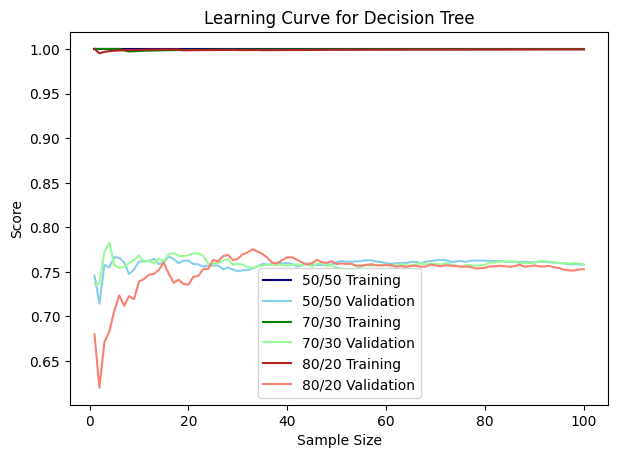

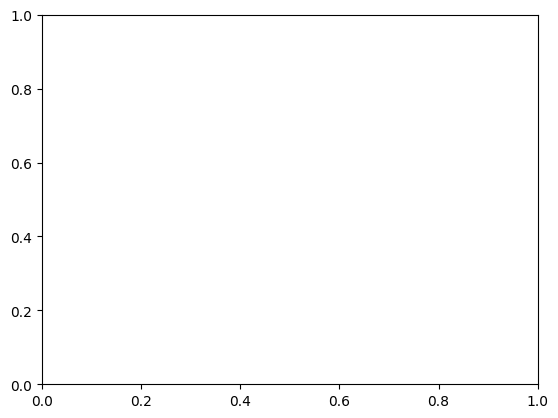

In [11]:
i = 0
# for each model
best_splits = pd.DataFrame(columns=['model', 'split'])
fitted_mods = []
for model in models:
    print(titles[i])
    # if titles[i] != 'Linear Regression':
    pipe = make_pipeline(StandardScaler(), model)
    

    j=0
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    sample_df = pd.DataFrame(columns=['accuracy','precision', 'recall', 'f1-score', 'error'],
                              index=index)
    best_df = pd.DataFrame(columns=['model', 'split', 'error'])
    
    for j in range(3): # each sample type
      
      if 'Polynomial' in titles[i]:
        poly_df = pd.DataFrame(columns=['polynomial', 'score'])
        poly = best_poly(train[j][0], train[j][1], test[j][0], test[j][1])
        print(poly)
        print(max(poly)) 
        # print(d)
        pipe = make_pipeline(StandardScaler(),
                             PolynomialFeatures(degree=d),
                             LinearRegression())
        pipe.fit(train[j][0], train[j][1])
      else:
        pipe.fit(train[j][0], train[j][1])
      print(splits[j])

      # METRICS
      # print(classification_report(y_true=test[j][1], y_pred=pred, zero_division=0))
      if 'Linear Regression' in titles[i]:
        scoring = {'accuracy' : get_acc_score, 
                    'precision' : get_prec_score,
                    'recall' : get_recall_score,
                    'f1_score':get_f1_score,
                    'error' : get_error_score}
        # m = cross_val_score(pipe, train[j][0], train[j][1], scoring='r2', cv=10)
        m = cross_validate(pipe, 
                          train[j][0], 
                          train[j][1],
                          scoring=scoring, 
                          cv=10) 
      else:
        scoring = {'accuracy' : make_scorer(accuracy_score), 
                  'precision' : make_scorer(precision_score, average='weighted', zero_division=0),
                  'recall' : make_scorer(recall_score, average='weighted'),
                  'f1_score':make_scorer(f1_score, average='weighted'),
                  'error': make_scorer(accuracy_score)}
        m = cross_validate(pipe, 
                          train[j][0], 
                          train[j][1],
                          scoring=scoring, 
                          cv=10) 
        m['test_error'] = 1-m['test_accuracy']

      # print(m)

      sample_df = pd.concat({'accuracy':pd.Series(m['test_accuracy']), 
                             'precision':pd.Series(m['test_precision']),
                             'recall':pd.Series(m['test_recall']),
                             'error':pd.Series(m['test_error'])}, 
                              axis=1)
      
      best_df.loc[len(best_df)] = [titles[i], splits[j], sample_df['error'].mean()]
      sample_df = sample_df.style.set_caption(f'Fold Metrics for {titles[i]} with {int(splits[j][0] * 100)}/{int(splits[j][1]*100)} Split')
      sample_df.index = index
      print('\n')
      display(sample_df)
      
      # LEARNING CURVES
      train_scores = get_learning_curve(pipe, train[j][0], train[j][1], titles[i])
      test_scores = get_learning_curve(pipe, test[j][0], test[j][1], titles[i])
   

      ax.plot(train_scores['percent'], 
              train_scores['scores'], 
              color=train_colors[j],
              label=f'{int(splits[j][0] * 100)}/{int(splits[j][1]*100)} Training')
      ax.plot(test_scores['percent'], 
              test_scores['scores'], 
              color=test_colors[j],
              label=f'{int(splits[j][0] * 100)}/{int(splits[j][1]*100)} Validation')
      ax.set_xlabel('Sample Size')
      ax.set_ylabel('Score')
      ax.set_title(f'Learning Curve for {titles[i]}')
      ax.legend(loc='best')
      # plt.xlim([0,100])
      # plt.ylim([0.0, 1.0])
      fig.tight_layout(pad=1.5)
      fig.show()

      j += 1

    max = best_df[best_df['error'] == best_df['error'].min()]
    best_splits = pd.concat([best_splits,max], ignore_index=True)
    # generalization error = error on test set

    
    i+=1  


best_splits = best_splits.style.set_caption(f'Best Split for Each Model')
display(best_splits)